In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movie_titles = pd.read_csv('movie_titles.txt')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
mov_rating = pd.merge(data,movie_titles,on='item_id')

In [7]:
mov_rating.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [8]:
avg_rating = mov_rating.groupby('title')['rating'].mean()
avg_rating.sort_values(ascending = False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

Average rating is not usually 5

In [9]:
mov_rating.groupby('title')['user_id'].count().unique() 

array([  9,   5, 109, 125,  41,  93,  72, 259,  59,  38,   4,   8, 127,
       151, 103,  37,  87,  54,  11,  39, 111,  67,  26, 152,  18,  65,
         1,  43, 431,  16,  32,  50, 219,  13,   6,  81, 291, 100, 124,
       284,  66,  15,   3,  12, 276,  10,   2, 164,  99,  53,  14,  19,
        33,  21, 180,  28,  69,   7,  63, 221,  55,  25, 160, 116,  83,
       115, 112, 130, 350,  57,  30, 101,  40,  44,  62, 201, 114, 142,
        91,  86,  29, 202, 156,  60,  49, 102,  79,  20,  48,  17,  42,
       171,  73,  31, 293, 162,  27, 275,  46,  22,  45, 251,  85, 122,
       189, 129,  34,  76, 120, 297, 208,  77,  95,  74, 165,  68, 254,
        24, 216, 106, 121, 243,  52,  56,  23,  80, 379, 147, 198,  96,
       179, 148,  97, 170, 137, 107, 295, 509,  82, 175, 104, 128, 154,
       134, 119, 256,  47, 240,  64, 299,  92, 188,  71, 166,  98,  35,
       194, 158, 123, 300, 133, 113, 177, 367,  70, 481, 206, 168,  89,
       157, 174, 508, 212, 197, 247, 321,  90,  61,  84, 153, 33

Here we see that there are some movies with very few ratings, such as 1/4/7 etc. This might be a reason for average rating to be 5

In [10]:
mov_rating.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

These are the movies with most number of ratings. They should be most recommended.

In [11]:
ratings = pd.DataFrame(avg_rating)
ratings['#ratings'] = pd.DataFrame(mov_rating.groupby('title')['rating'].count())
ratings.sort_values(by = ['#ratings','rating'], ascending = False).tail(10)

,rating,#ratings
title,,
The Courtyard (1995),1.0,1
Tigrero: A Film That Was Never Made (1994),1.0,1
To Cross the Rubicon (1991),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1
Vermont Is For Lovers (1992),1.0,1
"Very Natural Thing, A (1974)",1.0,1
"Vie est belle, La (Life is Rosey) (1987)",1.0,1
Wend Kuuni (God's Gift) (1982),1.0,1
"Woman in Question, The (1950)",1.0,1


### Data Visualisation

Text(0.5, 1.0, 'Histogram of number of rating')

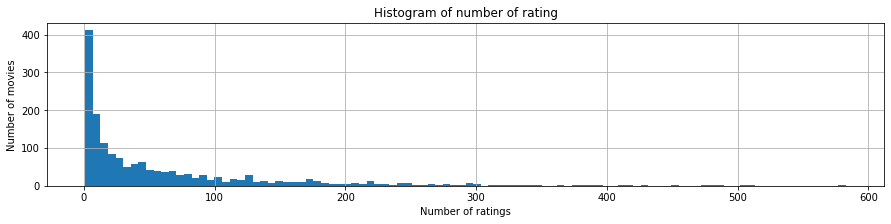

In [12]:
plt.figure(figsize=(15,3))
ratings['#ratings'].hist(bins=100)
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')
plt.title('Histogram of number of rating')

Text(0, 0.5, 'Number of movies')

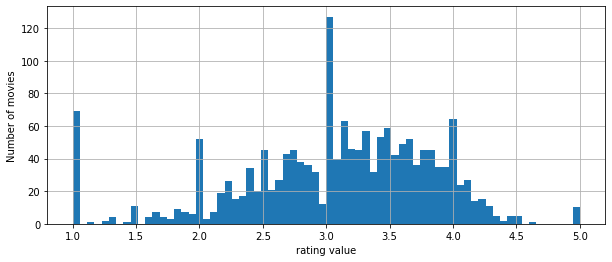

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)
plt.xlabel('rating value')
plt.ylabel('Number of movies')

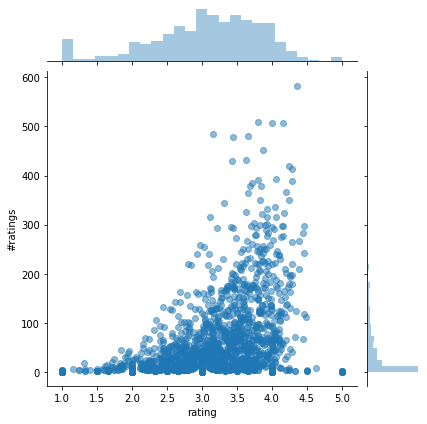

In [14]:
sns.jointplot(x='rating',y='#ratings',data=ratings,alpha=0.5)

In [15]:
moviemat = mov_rating.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


    This Matrix has the user ids as index and title as column names
    Values in cells are ratings of each user given to that movie
    
    So, each column has the ratings by each user fir that particular movie (col name). If no rating has been given by the      user, then it shows NaN value
    
    We will use this matrix to find recommendations about other movies depending on a given input movie using correlation
    
    We can then use 'corrwith()' method to get correlations between two pandas series

In [22]:
liked_movie = 'Star Wars (1977)'

In [23]:
liked_movie_ratings = moviemat[movie]

In [32]:
similar_movies = pd.DataFrame(moviemat.corrwith(liked_movie_ratings), columns = ['Correlation'])

In [41]:
similar_movies.sort_values('Correlation', ascending = False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


Removing these NaN values, we get:

In [38]:
similar_movies.dropna(inplace = True)

In [39]:
similar_movies.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [44]:
similar_movies = similar_movies.join(ratings['#ratings'])

ValueError: columns overlap but no suffix specified: Index(['#ratings'], dtype='object')

In [45]:
similar_movies.head(10)

,Correlation,#ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [46]:
similar_movies[similar_movies['#ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,#ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
